# Apartment price prediction with sklearn

### Libraries and settings

In [9]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
import pickle

### Import the apartment data

In [10]:
# Read and select variables
df_orig = pd.read_csv("cleaned_apartment_data_hospital(1).csv", sep=",", encoding='utf-8')

# Remove missing values
df = df_orig.dropna()
# Remove duplicates
df = df.drop_duplicates()

print(df.shape)
df.head(10)

(188, 21)


,bfs_number,rooms,area,price,postalcode,address,town,description_raw,bfs_name,pop,...,frg_pct,emp,tax_income,lat,lon,x,y,latitude,longitude,distance_to_hospital
0,261,2.5,45,2520,8004,8004 Zürich,Zürich,"«MÖBLIERT, TEMPORÄR: 2½ ZI-WOHNUNG IN ZÜRICH -...",Zürich,420217,...,32.458468,491193.0,85446,47.377140,8.515776,247925.203125,681344.9375,47.374449,8.541042,821.245610
1,261,2.5,48,3360,8004,8004 Zürich,Zürich,«MÖBLIERT: 2½ ZI-WOHNUNG IN ZÜRICH - KREIS 4»,Zürich,420217,...,32.458468,491193.0,85446,47.377140,8.515776,247925.203125,681344.9375,47.374449,8.541042,821.245610
2,261,2.5,50,2900,8004,8004 Zürich,Zürich,«Mitten im In-Quartier von Zürich»,Zürich,420217,...,32.458468,491193.0,85446,47.377140,8.515776,247925.203125,681344.9375,47.374449,8.541042,821.245610
3,261,1.0,10,1499,8004,8004 Zürich,Zürich,"«Studio, Zürich Zentrum, unbefristet»",Zürich,420217,...,32.458468,491193.0,85446,47.377140,8.515776,247925.203125,681344.9375,47.374449,8.541042,821.245610
4,261,2.5,73,3460,8041,8041 Zürich,Zürich,"«EXTRAVAGANT, MODERN, DIREKT AN DER SIHL!»",Zürich,420217,...,32.458468,491193.0,85446,47.322403,8.513797,241838.015625,681278.9375,47.374449,8.541042,821.245610
5,261,2.0,58,1825,8047,"Letzigraben 236, 8047 Zürich",Zürich,«Ihre neues Zuhause in Zürich!»,Zürich,420217,...,32.458468,491193.0,85446,47.370766,8.492476,247192.890625,679595.0000,47.370787,8.492474,609.260414
6,261,4.5,170,6600,8005,"Limmatstrasse 260, 8005 Zürich",Zürich,«Exklusiv! Grosszügig! Wohngenuss pur!»,Zürich,420217,...,32.458468,491193.0,85446,47.389133,8.525842,249269.078125,682086.6250,47.389120,8.525808,1109.412641
7,261,3.5,146,5550,8005,"Limmatstrasse 260, 8005 Zürich",Zürich,"«Exklusive, lichtdurchflutete 3.5-Zimmerwohnun...",Zürich,420217,...,32.458468,491193.0,85446,47.389133,8.525842,249269.078125,682086.6250,47.389120,8.525808,1109.412641
8,261,2.0,46,1475,8050,"Güetliweg 5, 8050 Zürich",Zürich,"«An zentraler, ruhiger Lage, gepflegte Umgebun...",Zürich,420217,...,32.458468,491193.0,85446,47.412838,8.530470,251909.375000,682399.3750,47.412819,8.530451,1010.223160
9,261,1.5,35,1740,8037,"Lehenstrasse 51, 8037 Zürich",Zürich,"«1.5-Zimmer-Wohnung an ruhiger, zentraler Lage»",Zürich,420217,...,32.458468,491193.0,85446,47.396530,8.523355,250088.859375,681887.4375,47.396533,8.523371,304.532991


In [11]:
# Meaning of variables:
# bfs_number: official municipality id
# bfs_name: official municipality name
# pop: number of residents (=population)
# pop_dens: population density (pop per km2)
# frg_pct: percentage foreigners
# emp: numer of employees

df.columns

Index(['bfs_number', 'rooms', 'area', 'price', 'postalcode', 'address', 'town',
       'description_raw', 'bfs_name', 'pop', 'pop_dens', 'frg_pct', 'emp',
       'tax_income', 'lat', 'lon', 'x', 'y', 'latitude', 'longitude',
       'distance_to_hospital'],
      dtype='object')

### Train/Test splitting

In [12]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df[['rooms', 'area', 'pop', 'pop_dens', 'frg_pct',
                                                        'emp', 'tax_income', 'distance_to_hospital']], 
                                                         df['price'], 
                                                        test_size=0.20, 
                                                        random_state=42)

<hr >

### Training the models

#### Questions
- What does the score represent? 
- How is the root mean squared error calculated?
- How good are the model performing? 1=bad, 10=perfect
- Is the LinearRegression model overfitting or underfitting?
- Is the RandomForestRegressor overfitting or underfitting?


In [13]:
# train linear_model = LinearRegression()
linear_model = LinearRegression()

# Fit the model
linear_model.fit(X_train, y_train)
print("Train score: ", linear_model.score(X_train, y_train))
print("Test score: ", linear_model.score(X_test, y_test))

print("Train RMSE: ", root_mean_squared_error(y_train, linear_model.predict(X_train)))
print("Test RMSE: ", root_mean_squared_error(y_test, linear_model.predict(X_test)))
 

Train score:  0.6198586792062926
Test score:  0.533099268369563
Train RMSE:  971.7897643202946
Test RMSE:  1094.0533222039505


In [14]:
# train random_forest_model = RandomForestRegressor()
random_forest_model = RandomForestRegressor(random_state=42)

# Fit the model
random_forest_model.fit(X_train, y_train)
print("Train score: ", random_forest_model.score(X_train, y_train))
print("Test score: ", random_forest_model.score(X_test, y_test))

print("Train RMSE: ", root_mean_squared_error(y_train, random_forest_model.predict(X_train)))
print("Test RMSE: ", root_mean_squared_error(y_test, random_forest_model.predict(X_test)))

Train score:  0.9201648077510556
Test score:  0.46201485526441155
Train RMSE:  445.34539758334387
Test RMSE:  1174.3873211510797


<hr >

### Random Forest feature importance

['area' 'distance_to_hospital' 'rooms' 'tax_income' 'emp' 'pop_dens' 'pop'
 'frg_pct']
[0.57440345 0.13112664 0.07391137 0.06098664 0.05011598 0.04909301
 0.03962278 0.02074013]


<Axes: ylabel='features'>

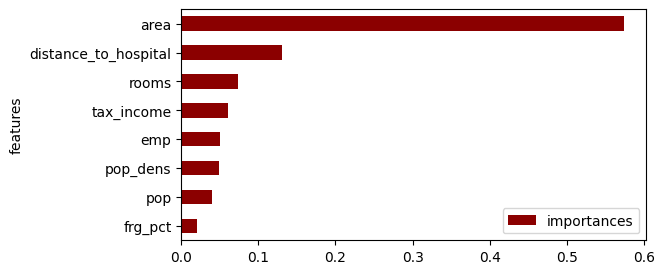

In [15]:
cols = random_forest_model.feature_names_in_

# Derive feature importance from random forest
importances = random_forest_model.feature_importances_
std         = np.std([tree.feature_importances_ for tree in random_forest_model.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]

# Print col-names and importances-values
print( cols[indices] )
print( importances[indices] )

# Barplot with feature importance
df_fi = pd.DataFrame({'features':cols,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances',
           x='features', 
           color='darkred', 
           figsize=(6,3))

### PKL Datei

In [16]:
with open('random_forest_regression_extended.pkl', 'wb') as file:
    pickle.dump(random_forest_model, file)

### Calculate the residuals

In [17]:
# make predictions
y_train_predict = random_forest_model.predict(X_train)
residuals = y_train - y_train_predict

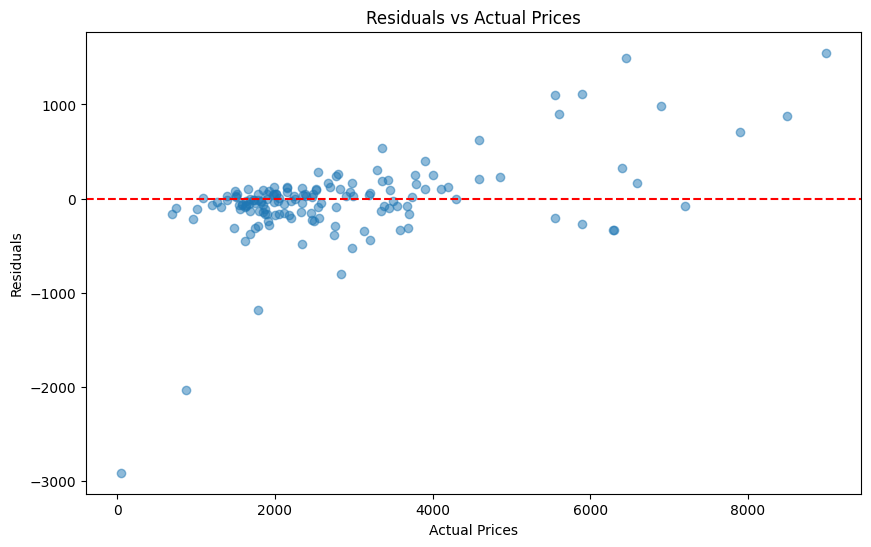

In [18]:
# Calculate residuals

plt.figure(figsize=(10, 6))
plt.scatter(y_train, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual Prices')
plt.show()

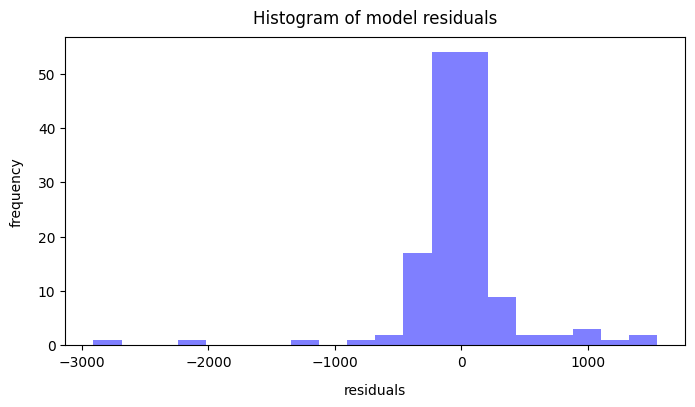

In [19]:
# Plot histogram of residuals
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=residuals, 
                            bins=20, 
                            color='blue',
                            alpha=0.5
                   )

# Set labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

plt.show()

### Error Analysis

Analyse the predictions. See which towns have the largest error.

In [20]:
# get all predictions for the training set.
y_train_predict = random_forest_model.predict(X_train)
df_with_residual = pd.DataFrame(X_train, columns=X_train.columns, copy=True)
df_with_residual['recidual (error)'] = np.abs(y_train_predict - y_train)
df_with_residual['price'] = y_train
df_with_residual['predicted_price'] = y_train_predict
print(df_with_residual.head())
# Add text, postalcode and town name
# we use join instead of merge, because we 'join' on the index column and do not perform a merge using a specific column
df_with_residual = df_with_residual.join(df[['description_raw', 'bfs_name', 'postalcode', 'town']])

     rooms  area     pop     pop_dens    frg_pct       emp  tax_income  \
35     7.0   180  420217  4778.994655  32.458468  491193.0       85446   
101    3.5   100  113173  1662.597326  24.535004   73339.0       70966   
107    2.5    91  113173  1662.597326  24.535004   73339.0       70966   
75     2.5    60  420217  4778.994655  32.458468  491193.0       85446   
96     3.5   102  113173  1662.597326  24.535004   73339.0       70966   

     distance_to_hospital  recidual (error)  price  predicted_price  
35             821.245610            328.22   6300          6628.22  
101            789.081712            127.85   2700          2572.15  
107            985.394238            152.25   2115          2267.25  
75             821.245610            243.42   2780          2536.58  
96             862.386601            301.09   3290          2988.91  


In [21]:
# check which location has the largest errors.
df_with_residual[(df_with_residual['recidual (error)'] > 500)].groupby(['pop', 'bfs_name']).size().sort_values(ascending=False)

pop     bfs_name     
420217  Zürich           10
113173  Winterthur        2
1316    Rheinau           1
13067   Zollikon          1
4840    Oetwil am See     1
dtype: int64

In [22]:

df_with_residual[(df_with_residual['recidual (error)'] > 500)]['description_raw'].to_csv('data_with_large_residuals.csv', 
          sep=",", 
          encoding='utf-8',
          index=False)